In [1]:
# dataCollection ---> Data Preprocessing(Univariate,Bivariate)---> Featurization--> Model_Selection---> Model Training---> Model Validation---> Model- Tuning---> Deployment

# Import library

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

C:\Users\91930\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\91930\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (
C:\Users\91930\AppData\Local\Temp\ipykernel_44656\2793088780.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


# Data Collection

In [3]:
#load data
df = pd.read_csv('Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
# get the summary of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


# Data Preprocessing + Featurization

Exploratory data analysis

In [5]:
df['User ID'].nunique()

400

In [6]:
# As the columns has 400 unique entries out of 400 so it will not have any effect with target variable.
df.drop('User ID', axis = 1, inplace = True)  # Axis = 1 means column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Gender           400 non-null    object
 1   Age              400 non-null    int64 
 2   EstimatedSalary  400 non-null    int64 
 3   Purchased        400 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 12.6+ KB


In [7]:
# univariate analysis
# Gender
df['Gender'].value_counts()

Gender
Female    204
Male      196
Name: count, dtype: int64

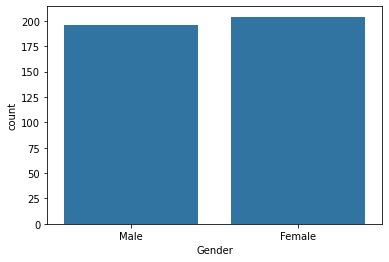

In [8]:
sns.countplot(x = df['Gender'])
plt.show()

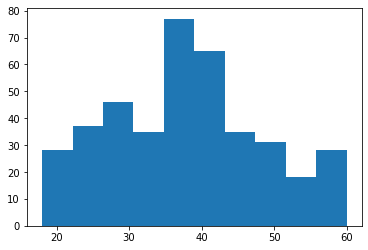

In [9]:
# Age
plt.hist(x=df['Age'])
plt.show()

In [10]:
# data is normally distribute with age group of 18 -60 years

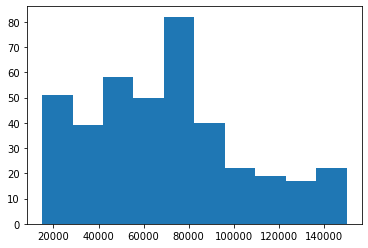

In [11]:
# Estimated salary
plt.hist(x=df['EstimatedSalary'])
plt.show()

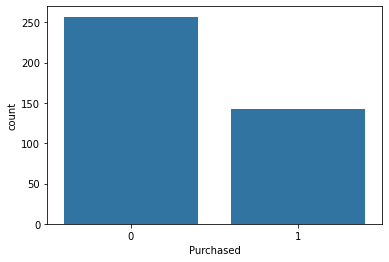

In [12]:
# target variable purchased
sns.countplot(x = df['Purchased'])
plt.show()

In [13]:
df['Purchased'].value_counts(normalize = True)

Purchased
0    0.6425
1    0.3575
Name: proportion, dtype: float64

In [14]:
# data is slightly imbalance

In [15]:
# Encoding
df['Gender'].replace({'Male' : 0, 'Female':1}, inplace =True)

In [16]:
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,0,19,19000,0
1,0,35,20000,0
2,1,26,43000,0
3,1,27,57000,0
4,0,19,76000,0


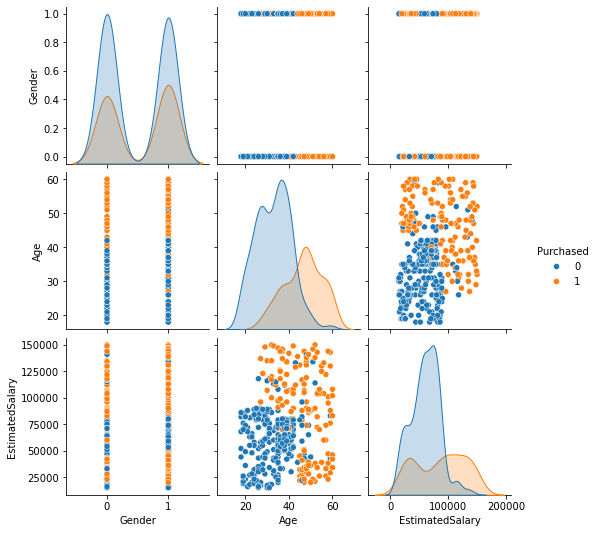

In [17]:
sns.pairplot(df, hue='Purchased')
plt.show()

In [18]:
# It is clear from pairplot the Gender is not strongly associated with Purchased column.
df.drop('Gender', axis =1, inplace = True)
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


# Model Selection

In [19]:
# Separating inputs and output variables
X = df.drop('Purchased', axis =1)
y = df['Purchased']

In [20]:
# Split data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state = 100)
print(X_train.shape, X_test.shape)

(320, 2) (80, 2)


In [21]:
X_train[:5] # First 5 values from (training input) data

,Age,EstimatedSalary
190,24,84000
46,25,79000
50,24,32000
377,42,53000
121,37,72000


# Scaling

In [22]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)

In [23]:
X_train[:5]

array([[-1.27832135,  0.38895733],
       [-1.18265651,  0.24543064],
       [-1.27832135, -1.10372024],
       [ 0.44364567, -0.50090815],
       [-0.0346785 ,  0.04449327]])

In [24]:
model = []
train_accuracy_results = []
test_accuracy_results = []
test_precision_results = []
test_recall_results = []
test_f1_score_results = []
test_roc_score_results= []

# Model Training

# Logistic Regression

In [25]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

# Model Validation

In [26]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
y_train_pred = logreg.predict(X_train)
y_test_pred = logreg.predict(X_test)

train_acc =  accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1_score = f1_score(y_test, y_test_pred)
test_roc_auc_score = roc_auc_score(y_test, y_test_pred)

print("Train Accuracy :", train_acc)
print("Test Accuracy :", test_acc)
print("Test Precision Score:", test_precision)
print("Test Recall Score:", test_recall)
print("Test F1-Score Score:", test_f1_score)
print("Test ROC-AUC Score:", test_roc_auc_score)

Train Accuracy : 0.853125
Test Accuracy : 0.825
Test Precision Score: 0.8695652173913043
Test Recall Score: 0.6451612903225806
Test F1-Score Score: 0.7407407407407407
Test ROC-AUC Score: 0.7919684002633312


In [27]:
model.append('Logistics Regression')
train_accuracy_results.append(train_acc)
test_accuracy_results.append(test_acc)
test_precision_results.append(test_precision)
test_recall_results.append(test_recall)
test_f1_score_results.append(test_f1_score)
test_roc_score_results.append(test_roc_auc_score)

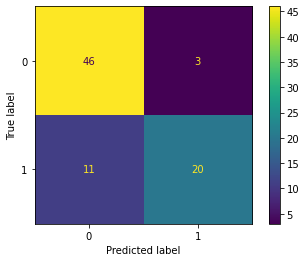

In [28]:
cm = confusion_matrix(y_test, y_test_pred, labels=logreg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logreg.classes_)
disp.plot()
plt.show()

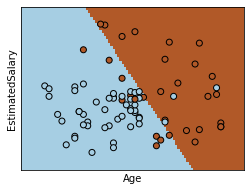

In [29]:
from sklearn.inspection import DecisionBoundaryDisplay
_, ax = plt.subplots(figsize=(4, 3))
DecisionBoundaryDisplay.from_estimator(
    logreg,
    X_test,
    cmap=plt.cm.Paired,
    ax=ax,
    response_method="predict",
    plot_method="pcolormesh",
    shading="auto",
    xlabel="Age",
    ylabel="EstimatedSalary",
    eps=0.5,
)

# Plot also the training points
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolors="k", cmap=plt.cm.Paired)

plt.xticks(())
plt.yticks(())

plt.show()

# Naive Bayes

In [30]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [31]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
y_train_pred = nb.predict(X_train)
y_test_pred = nb.predict(X_test)

train_acc =  accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1_score = f1_score(y_test, y_test_pred)
test_roc_auc_score = roc_auc_score(y_test, y_test_pred)

print("Train Accuracy :", train_acc)
print("Test Accuracy :", test_acc)
print("Test Precision Score:", test_precision)
print("Test Recall Score:", test_recall)
print("Test F1-Score Score:", test_f1_score)
print("Test ROC-AUC Score:", test_roc_auc_score)

Train Accuracy : 0.896875
Test Accuracy : 0.85
Test Precision Score: 0.88
Test Recall Score: 0.7096774193548387
Test F1-Score Score: 0.7857142857142857
Test ROC-AUC Score: 0.8242264647794603


In [32]:
model.append('Naive Bayes')
train_accuracy_results.append(train_acc)
test_accuracy_results.append(test_acc)
test_precision_results.append(test_precision)
test_recall_results.append(test_recall)
test_f1_score_results.append(test_f1_score)
test_roc_score_results.append(test_roc_auc_score)

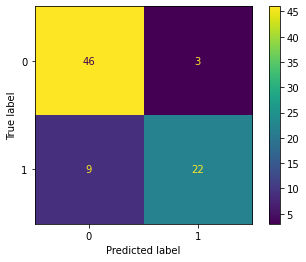

In [33]:
cm = confusion_matrix(y_test, y_test_pred, labels=nb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=nb.classes_)
disp.plot()
plt.show()

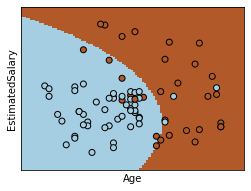

In [34]:
from sklearn.inspection import DecisionBoundaryDisplay
_, ax = plt.subplots(figsize=(4, 3))
DecisionBoundaryDisplay.from_estimator(
    nb,
    X_test,
    cmap=plt.cm.Paired,
    ax=ax,
    response_method="predict",
    plot_method="pcolormesh",
    shading="auto",
    xlabel="Age",
    ylabel="EstimatedSalary",
    eps=0.5,
)
# Plot also the training points
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolors="k", cmap=plt.cm.Paired)

plt.xticks(())
plt.yticks(())

plt.show()

# KNN

In [35]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors= 5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [36]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

train_acc =  accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1_score = f1_score(y_test, y_test_pred)
test_roc_auc_score = roc_auc_score(y_test, y_test_pred)

print("Train Accuracy :", train_acc)
print("Test Accuracy :", test_acc)
print("Test Precision Score:", test_precision)
print("Test Recall Score:", test_recall)
print("Test F1-Score Score:", test_f1_score)
print("Test ROC-AUC Score:", test_roc_auc_score)

Train Accuracy : 0.9375
Test Accuracy : 0.9
Test Precision Score: 0.9259259259259259
Test Recall Score: 0.8064516129032258
Test F1-Score Score: 0.8620689655172413
Test ROC-AUC Score: 0.8828176431863067


In [37]:
model.append('KNN')
train_accuracy_results.append(train_acc)
test_accuracy_results.append(test_acc)
test_precision_results.append(test_precision)
test_recall_results.append(test_recall)
test_f1_score_results.append(test_f1_score)
test_roc_score_results.append(test_roc_auc_score)

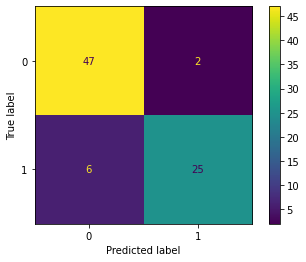

In [38]:
cm = confusion_matrix(y_test, y_test_pred, labels=knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot()
plt.show()

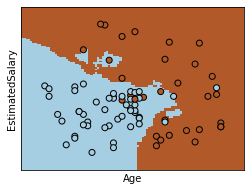

In [39]:
from sklearn.inspection import DecisionBoundaryDisplay
_, ax = plt.subplots(figsize=(4, 3))
DecisionBoundaryDisplay.from_estimator(
    knn,
    X_test,
    cmap=plt.cm.Paired,
    ax=ax,
    response_method="predict",
    plot_method="pcolormesh",
    shading="auto",
    xlabel="Age",
    ylabel="EstimatedSalary",
    eps=0.5,
)
# Plot also the training points
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolors="k", cmap=plt.cm.Paired)

plt.xticks(())
plt.yticks(())

plt.show()

# Decision Tree

In [40]:
from sklearn.tree import DecisionTreeClassifier
dt =  DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [41]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

train_acc =  accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1_score = f1_score(y_test, y_test_pred)
test_roc_auc_score = roc_auc_score(y_test, y_test_pred)

print("Train Accuracy :", train_acc)
print("Test Accuracy :", test_acc)
print("Test Precision Score:", test_precision)
print("Test Recall Score:", test_recall)
print("Test F1-Score Score:", test_f1_score)
print("Test ROC-AUC Score:", test_roc_auc_score)

Train Accuracy : 0.99375
Test Accuracy : 0.8375
Test Precision Score: 0.8214285714285714
Test Recall Score: 0.7419354838709677
Test F1-Score Score: 0.7796610169491526
Test ROC-AUC Score: 0.8199473337722186


In [42]:
model.append('Decision Tree')
train_accuracy_results.append(train_acc)
test_accuracy_results.append(test_acc)
test_precision_results.append(test_precision)
test_recall_results.append(test_recall)
test_f1_score_results.append(test_f1_score)
test_roc_score_results.append(test_roc_auc_score)

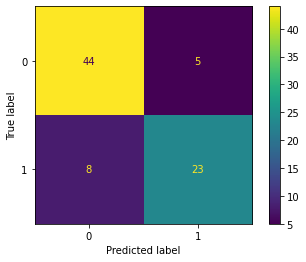

In [43]:
cm = confusion_matrix(y_test, y_test_pred, labels=dt.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dt.classes_)
disp.plot()
plt.show()

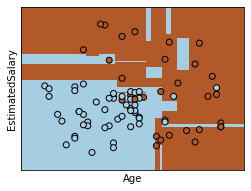

In [44]:
from sklearn.inspection import DecisionBoundaryDisplay
_, ax = plt.subplots(figsize=(4, 3))
DecisionBoundaryDisplay.from_estimator(
    dt,
    X_test,
    cmap=plt.cm.Paired,
    ax=ax,
    response_method="predict",
    plot_method="pcolormesh",
    shading="auto",
    xlabel="Age",
    ylabel="EstimatedSalary",
    eps=0.5,
)
# Plot also the training points
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolors="k", cmap=plt.cm.Paired)

plt.xticks(())
plt.yticks(())

plt.show()

[Text(0.45588235294117646, 0.9545454545454546, 'x[0] <= 0.491\ngini = 0.455\nsamples = 320\nvalue = [208, 112]'),
 Text(0.19117647058823528, 0.8636363636363636, 'x[1] <= 0.576\ngini = 0.26\nsamples = 228\nvalue = [193, 35]'),
 Text(0.058823529411764705, 0.7727272727272727, 'x[1] <= 0.202\ngini = 0.051\nsamples = 191\nvalue = [186, 5]'),
 Text(0.029411764705882353, 0.6818181818181818, 'gini = 0.0\nsamples = 145\nvalue = [145, 0]'),
 Text(0.08823529411764706, 0.6818181818181818, 'x[0] <= -0.13\ngini = 0.194\nsamples = 46\nvalue = [41, 5]'),
 Text(0.058823529411764705, 0.5909090909090909, 'gini = 0.0\nsamples = 35\nvalue = [35, 0]'),
 Text(0.11764705882352941, 0.5909090909090909, 'x[1] <= 0.375\ngini = 0.496\nsamples = 11\nvalue = [6, 5]'),
 Text(0.08823529411764706, 0.5, 'x[1] <= 0.231\ngini = 0.444\nsamples = 9\nvalue = [6, 3]'),
 Text(0.058823529411764705, 0.4090909090909091, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.11764705882352941, 0.4090909090909091, 'x[1] <= 0.26\ngini 

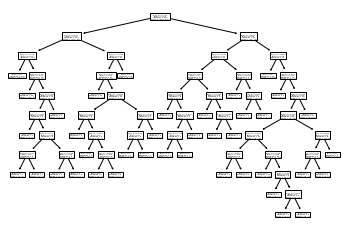

In [47]:
from sklearn import tree 
tree.plot_tree(dt)

# Support Vector Machine

In [48]:
from sklearn import svm
sv = svm.SVC()
sv.fit(X_train, y_train)

SVC()

In [49]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
y_train_pred = sv.predict(X_train)
y_test_pred = sv.predict(X_test)

train_acc =  accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1_score = f1_score(y_test, y_test_pred)
test_roc_auc_score = roc_auc_score(y_test, y_test_pred)

print("Train Accuracy :", train_acc)
print("Test Accuracy :", test_acc)
print("Test Precision Score:", test_precision)
print("Test Recall Score:", test_recall)
print("Test F1-Score Score:", test_f1_score)
print("Test ROC-AUC Score:", test_roc_auc_score)

Train Accuracy : 0.90625
Test Accuracy : 0.9
Test Precision Score: 0.896551724137931
Test Recall Score: 0.8387096774193549
Test F1-Score Score: 0.8666666666666667
Test ROC-AUC Score: 0.8887425938117184


In [50]:
model.append('Support Vector Machine')
train_accuracy_results.append(train_acc)
test_accuracy_results.append(test_acc)
test_precision_results.append(test_precision)
test_recall_results.append(test_recall)
test_f1_score_results.append(test_f1_score)
test_roc_score_results.append(test_roc_auc_score)

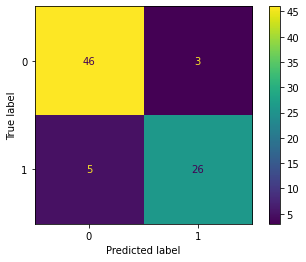

In [51]:
cm = confusion_matrix(y_test, y_test_pred, labels=sv.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=sv.classes_)
disp.plot()
plt.show()

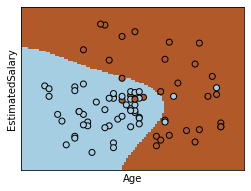

In [52]:
from sklearn.inspection import DecisionBoundaryDisplay
_, ax = plt.subplots(figsize=(4, 3))
DecisionBoundaryDisplay.from_estimator(
    sv,
    X_test,
    cmap=plt.cm.Paired,
    ax=ax,
    response_method="predict",
    plot_method="pcolormesh",
    shading="auto",
    xlabel="Age",
    ylabel="EstimatedSalary",
    eps=0.5,
)
# Plot also the training points
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolors="k", cmap=plt.cm.Paired)

plt.xticks(())
plt.yticks(())

plt.show()

In [53]:
result = pd.DataFrame({'Models' : model,
                      'Train_Accuracy': train_accuracy_results,
                      'Test_Accuracy': test_accuracy_results,
                      'Test_Precision': test_precision_results,
                      'Test_Recall' : test_recall_results,
                      'Test_F1_Score': test_f1_score_results,
                      'Test_ROC_AUC': test_roc_score_results})
result

,Models,Train_Accuracy,Test_Accuracy,Test_Precision,Test_Recall,Test_F1_Score,Test_ROC_AUC
0,Logistics Regression,0.853125,0.8250,0.869565,0.645161,0.740741,0.791968
1,Naive Bayes,0.896875,0.8500,0.880000,0.709677,0.785714,0.824226
2,KNN,0.937500,0.9000,0.925926,0.806452,0.862069,0.882818
3,Decision Tree,0.993750,0.8375,0.821429,0.741935,0.779661,0.819947
4,Support Vector Machine,0.906250,0.9000,0.896552,0.838710,0.866667,0.888743
